In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier
from utils import build_features, evaluate, feature_importances

%matplotlib inline
pd.options.display.max_columns=999

# Build models on actionable, hand-crafted features

In [2]:
X, y = build_features()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(f"Train size: {len(y_train)} rows.")
print(f"Test size: {len(y_test)} rows.")

          HasAnswer
count  14890.000000
mean       0.878039
std        0.327252
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
       ContainsImage      TagCount      Untagged   TitleLength    BodyLength  \
count   14890.000000  14890.000000  14890.000000  14890.000000  14890.000000   
mean        0.535326      2.508395      0.000201      9.887911    167.520819   
std         0.498767      1.192738      0.014193      4.079586    132.089553   
min         0.000000      0.000000      0.000000      2.000000     15.000000   
25%         0.000000      2.000000      0.000000      7.000000     82.000000   
50%         1.000000      2.000000      0.000000      9.000000    133.000000   
75%         1.000000      3.000000      0.000000     12.000000    209.000000   
max         1.000000      5.000000      1.000000     34.000000   1688.000000   

       IsTitleQuestion  BodyQuestionCount      ViewCount  
count     14890.000000        14890.0000

In [3]:
# Build a logistic regression model
model = Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.317532
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HasAnswer   No. Observations:                13401
Model:                          Logit   Df Residuals:                    13393
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:                  0.1456
Time:                        15:22:20   Log-Likelihood:                -4255.2
converged:                       True   LL-Null:                       -4980.3
Covariance Type:            nonrobust   LLR p-value:                5.400e-309
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ContainsImage         0.0931      0.054      1.709      0.087      -0.014       0.200
TagCount              0.1114      0.022      5.092      0.000       0.069       0.154
Untagged             -1.5697      1.229     -1.277      0.202      -3.979       0.840
TitleLength           0.0323      0.007      4.928      0.000       0.019       0.045
BodyLength           -0.0004      0.000     -1.496      0.135      -0.001       0.000
IsTitleQuestion       0.4384      0.062      7.032      0.000       0.316       0.561
BodyQuestionCount     0.1457      0.025      5.947      0.000       0.098       0.194
ViewCount             0.0032      0.000     19.076      0.000       0.003       0.004
=====================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

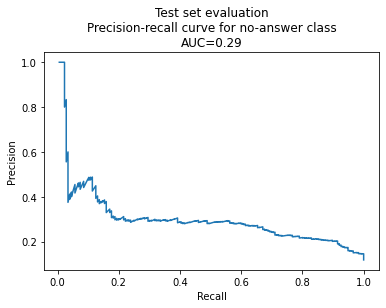

In [4]:
evaluate(model, X_test, y_test)

# Build models on high-dimensional, NLP features

          HasAnswer
count  14890.000000
mean       0.878039
std        0.327252
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
       ContainsImage      TagCount      Untagged   TitleLength    BodyLength  \
count   14890.000000  14890.000000  14890.000000  14890.000000  14890.000000   
mean        0.535326      2.508395      0.000201      9.887911    167.520819   
std         0.498767      1.192738      0.014193      4.079586    132.089553   
min         0.000000      0.000000      0.000000      2.000000     15.000000   
25%         0.000000      2.000000      0.000000      7.000000     82.000000   
50%         1.000000      2.000000      0.000000      9.000000    133.000000   
75%         1.000000      3.000000      0.000000     12.000000    209.000000   
max         1.000000      5.000000      1.000000     34.000000   1688.000000   

       IsTitleQuestion  BodyQuestionCount      ViewCount  
count     14890.000000        14890.0000

/home/weimachine/.virtualenvs/data_template/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


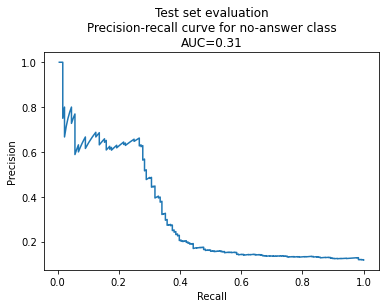

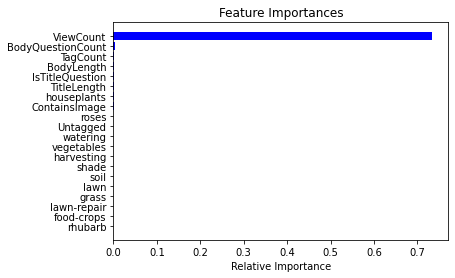

In [5]:
X, y = build_features(use_tags=True, use_nlp={"vectorizer": "tfidf", "text_col": "Body"})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(f"Train size: {len(y_train)} rows.")
print(f"Test size: {len(y_test)} rows.")

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)
feature_importances(model, X_train.columns)